In [88]:
import glob,os,sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
import re
import scipy.stats as st
from os.path import expanduser
import cmath
import scipy.optimize as op
import time
import gzip
import pandas as pd
from sympy import Symbol
from sympy.solvers import solve
from matplotlib.colors import LogNorm
import pylab as P
%matplotlib inline

In [89]:
home = os.path.expanduser("~")

direc = os.listdir(".")

In [135]:
name = 'alllc_full_info_w_smoothing.CSV'  
#Library/Mobile Documents/com~apple~CloudDocs/Microlensing/OSU trip/Matt/result_file/
tempdata = home+'/Desktop/trial_runs/'+str(name)
#&((df['f_s_true']*( (2 + df['u0_true']**2) / (df['u0_true']*np.sqrt(4 + df['u0_true']**2)) ) + (1-df['f_s_true']) )>1.5) & (df['u0_true']>0.1)
df = pd.read_csv(tempdata)

# df['u0_true'] = np.abs(df['u0_true'])
# df['u0_fitted'] = np.abs(df['u0_fitted'])

In [136]:
len(df)

13010

In [137]:
df[df.index==50]

,index,D_l,D_s,alpha,ampl_fitted,chi_2_1,chi_2_2,del_t,f_s_fitted,f_s_true,...,t0_fitted,t0_true,tE_fitted,tE_true,tEp_fitted,tEp_true,tp_fitted,u0_fitted,u0_true,x_c
50,50,8.779,22.0932,352.667,0.040172,-24274.2056,-23647.20277,1.162001,0.14644,0.042089,...,1442.193408,1442.21963,23.643476,23.7143,0.01372,0.0926,1442.887495,0.19109,0.18988,0.193332


In [138]:
red_chi_2_1 = np.abs(2*df['chi_2_1'])
red_chi_2_2 = np.abs(2*df['chi_2_2'])
red_chi_subt = red_chi_2_1 - red_chi_2_2

In [139]:
df_org = df

In [140]:
df_org[df_org.index==50]

,index,D_l,D_s,alpha,ampl_fitted,chi_2_1,chi_2_2,del_t,f_s_fitted,f_s_true,...,t0_fitted,t0_true,tE_fitted,tE_true,tEp_fitted,tEp_true,tp_fitted,u0_fitted,u0_true,x_c
50,50,8.779,22.0932,352.667,0.040172,-24274.2056,-23647.20277,1.162001,0.14644,0.042089,...,1442.193408,1442.21963,23.643476,23.7143,0.01372,0.0926,1442.887495,0.19109,0.18988,0.193332


In [141]:
name = 'double-peaked.csv'  
#Library/Mobile Documents/com~apple~CloudDocs/Microlensing/OSU trip/Matt/result_file/
tempdata2 = home+'/Desktop/trial_runs/'+str(name)
#&((df['f_s_true']*( (2 + df['u0_true']**2) / (df['u0_true']*np.sqrt(4 + df['u0_true']**2)) ) + (1-df['f_s_true']) )>1.5) & (df['u0_true']>0.1)
dd = pd.read_csv(tempdata2)

In [142]:
df_new_test = df
df = df.reset_index()
for i in range(len(df)):
    if df['name'][i] in np.asarray(dd['name']):
        #print i
        df = df.drop([i], axis=0)
print 'done'

done


In [143]:
print len(df)
#df = df[ (df['chi_2_2']>-25000) & (df['s_fitted']<5) & ((df['f_s_true']*( (2 + df['u0_true']**2) / (df['u0_true']*np.sqrt(4 + df['u0_true']**2)) ) + (1-df['f_s_true']) )>1.1)]
#df = df[(np.abs(df['t0_fitted']-df['tp_fitted'])>1) & ((-2*df['chi_2_2']/41039)>1.003) ]
df['q_fitted_log'][df['q_fitted_log']>0] = np.log10( 1/df['q_fitted'][df['q_fitted_log']>0] )
df['q_fitted'][df['q_fitted_log']>0] = ( 1/df['q_fitted'][df['q_fitted_log']>0] )

df = df[((red_chi_2_1-red_chi_2_2)>40)]
print (len(df))

12314
9309


/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [144]:
#df = df[np.abs(df['u0_fitted'])>0.045] #02/20/2018
df = df[(df['s_fitted']>1.03)|(df['s_fitted']<0.97)] #03/25/2019

print(len(df))

7813


In [145]:
df = df[df['s_fitted']<5]
len(df)

7355

In [146]:
len(df_org)

13010

In [147]:
len(df_org)

13010

In [148]:
df_remaining = df_org

In [149]:
len(df_remaining)

13010

In [150]:
for i in range (len(df_remaining)):
    if str(df_remaining['name'][i]) in df['name'].values.T.tolist():
        df_remaining = df_remaining[df_remaining.index != i]
    
        

In [151]:
len(df_org)

13010

In [6]:
len(df[red_chi_subt<40])/float(len(df))

0.23658724058416603

In [32]:
len(df[df['u0_true']<0])

0

In [33]:
#df_u0 = df[df['u0_fitted']>0.045]

In [38]:
df_u0['del_t_fitted']= np.abs(df_u0['t0_fitted']-df_u0['tp_fitted'])

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
df_u0[df_u0['name']=='cassan_8_88_1335.det.lc.gz']['chi_2_1']-df_u0[df_u0['name']=='cassan_8_88_1335.det.lc.gz']['chi_2_2']

12904   -13.92264
dtype: float64

In [43]:
df_test = df_u0[df_u0['s_true']<0.7]

In [44]:
df_test[['name','u0_true','u0_fitted','s_fitted','s_true','del_t','del_t_fitted']][((df_test['u0_fitted']/df_test['u0_true'])<1.1)&((df_test['u0_fitted']/df_test['u0_true'])>0.9)]

,name,u0_true,u0_fitted,s_fitted,s_true,del_t,del_t_fitted
4,cassan_0_109_2397.det.lc.gz,0.608801,0.640754,1.496885,0.683782,3.900705,3.713530
15,cassan_0_123_591.det.lc.gz,0.109580,0.116291,1.066971,0.402304,34.222032,0.903716
31,cassan_0_17_1966.det.lc.gz,0.046437,0.046725,1.024517,0.526033,162.027576,1.515732
45,cassan_0_30_255.det.lc.gz,0.273314,0.272714,3.636956,0.274684,44.121941,44.108738
75,cassan_0_44_3027.det.lc.gz,0.286300,0.285883,0.866432,0.599644,11.307372,0.357016
81,cassan_0_47_2036.det.lc.gz,1.184640,1.215614,0.527894,0.515560,23.956987,18.589030
82,cassan_0_47_356.det.lc.gz,0.956022,0.985138,0.610000,0.596988,6.549347,3.848354
90,cassan_0_58_591.det.lc.gz,1.613890,1.554261,0.489109,0.458168,63.997831,6.508960
103,cassan_0_69_2870.det.lc.gz,0.050063,0.050716,0.970815,0.639422,17.037842,0.559868
126,cassan_0_87_3319.det.lc.gz,0.395209,0.395387,1.845862,0.537494,26.047228,24.925940


In [152]:
name = 'double-peaked.csv'  
#Library/Mobile Documents/com~apple~CloudDocs/Microlensing/OSU trip/Matt/result_file/
tempdata2 = home+'/Desktop/trial_runs/'+str(name)
#&((df['f_s_true']*( (2 + df['u0_true']**2) / (df['u0_true']*np.sqrt(4 + df['u0_true']**2)) ) + (1-df['f_s_true']) )>1.5) & (df['u0_true']>0.1)
dd = pd.read_csv(tempdata2)

In [8]:
print len(df)
#df = df[ (df['chi_2_2']>-25000) & (df['s_fitted']<5) & ((df['f_s_true']*( (2 + df['u0_true']**2) / (df['u0_true']*np.sqrt(4 + df['u0_true']**2)) ) + (1-df['f_s_true']) )>1.1)]
#df = df[(np.abs(df['t0_fitted']-df['tp_fitted'])>1) & ((-2*df['chi_2_2']/41039)>1.003) ]
df_org = df
df['q_fitted_log'][df['q_fitted_log']>1] = np.log10( 1/df['q_fitted'][df['q_fitted_log']>0] )
df['q_fitted'][df['q_fitted_log']>1] = ( 1/df['q_fitted'][df['q_fitted_log']>0] )



13010


/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


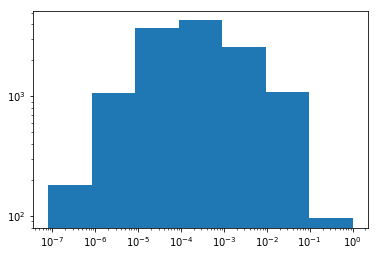

In [9]:
plt.hist(df['q_true'],bins=np.logspace(np.log10(8e-8),np.log10(1),8))
plt.xscale('log')
plt.yscale('log')

In [10]:
hist ,edge = np.histogram(df['q_true'],bins=np.logspace(np.log10(8e-8),np.log10(1),7))
hist2 ,edge2 = np.histogram(df['q_true'][((red_chi_2_1-red_chi_2_2)<40)],bins=np.logspace(np.log10(8e-8),np.log10(1),7))
hist3 ,edge3 = np.histogram(df['q_true'][(df['u0_fitted']<0.045)],bins=np.logspace(np.log10(8e-8),np.log10(1),7))
hist4 ,edge4 = np.histogram(df['q_true'][(df['s_fitted']>5)],bins=np.logspace(np.log10(8e-8),np.log10(1),7))
hist5 ,edge5 = np.histogram(dd['q_true'],bins=np.logspace(np.log10(8e-8),np.log10(1),7))



In [11]:
hist2 = [(float(hist2[i])/hist[i]) for i in arange(0,6)]
hist3 = [(float(hist3[i])/hist[i]) for i in arange(0,6)]
hist4 = [(float(hist4[i])/hist[i]) for i in arange(0,6)]
hist5 = [(float(hist5[i])/hist[i]) for i in arange(0,6)]


In [12]:
hist2

[0.46564885496183206,
 0.3404605263157895,
 0.22771896053897978,
 0.18554587391081498,
 0.2274390243902439,
 0.29411764705882354]

TypeError: only size-1 arrays can be converted to Python scalars

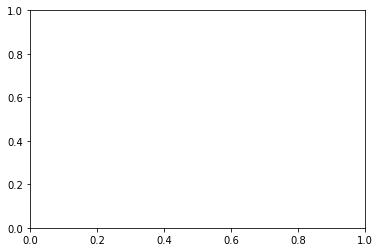

In [13]:
plt.bar(edge2[:-1], [hist2,hist3,hist4,hist5], width=[(edge2[i+1]-edge2[i]) for i in arange(len(edge2)-1)])#, color='blue',label='$\Delta {{\chi}^2} <40$')
# plt.bar(edge3[:-1], hist3 , width=[(edge3[i+1]-edge3[i]) for i in arange(len(edge3)-1)], color='green',label= '$u_0 < 0.045$',alpha=0.8)
# plt.bar(edge4[:-1], hist4 , width=[(edge4[i+1]-edge4[i]) for i in arange(len(edge4)-1)], color='red',label= '${s}_{fitted} >5$')
# plt.bar(edge5[:-1], hist5 , width=[(edge5[i+1]-edge5[i]) for i in arange(len(edge5)-1)], color='cyan',label = 'Multi-peaked',alpha=0.7)

plt.xlabel('Mass Ratio',size=27)
plt.ylabel('Fraction of total light curves in each bin',size=27)

plt.tick_params(axis='both',labelsize=25)
plt.tick_params(axis='both',width=2, which='minor',top='off',right='off')
plt.tick_params(axis='both',width=2, which='major',top='off',right='off')



plt.legend(fontsize=30)
fig = plt.gcf()
fig.set_size_inches(11,8.5)
plt.xscale('log')
plt.xlim(3e-8,2)
#plt.yscale('log')
fig = plt.gcf()
fig.set_size_inches(18.0,12.0)
fig.savefig(home+'/Desktop/hist_mass_ratio_smoothed_normlized_to_each_bin.png')


In [153]:
df = df_org

In [155]:
len(df)

13010

In [156]:
x1 = np.array(df['q_true'])
x2 = np.array(df['q_true'][((red_chi_2_1-red_chi_2_2)<40)])
x3 = np.array(df['q_true'][(df['u0_fitted']<0.045)])
x4 = np.array(df['q_true'][(df['s_fitted']>5)])
x5 = np.array((dd['q_true']))
x = np.array([x1,x2,x3,x4])




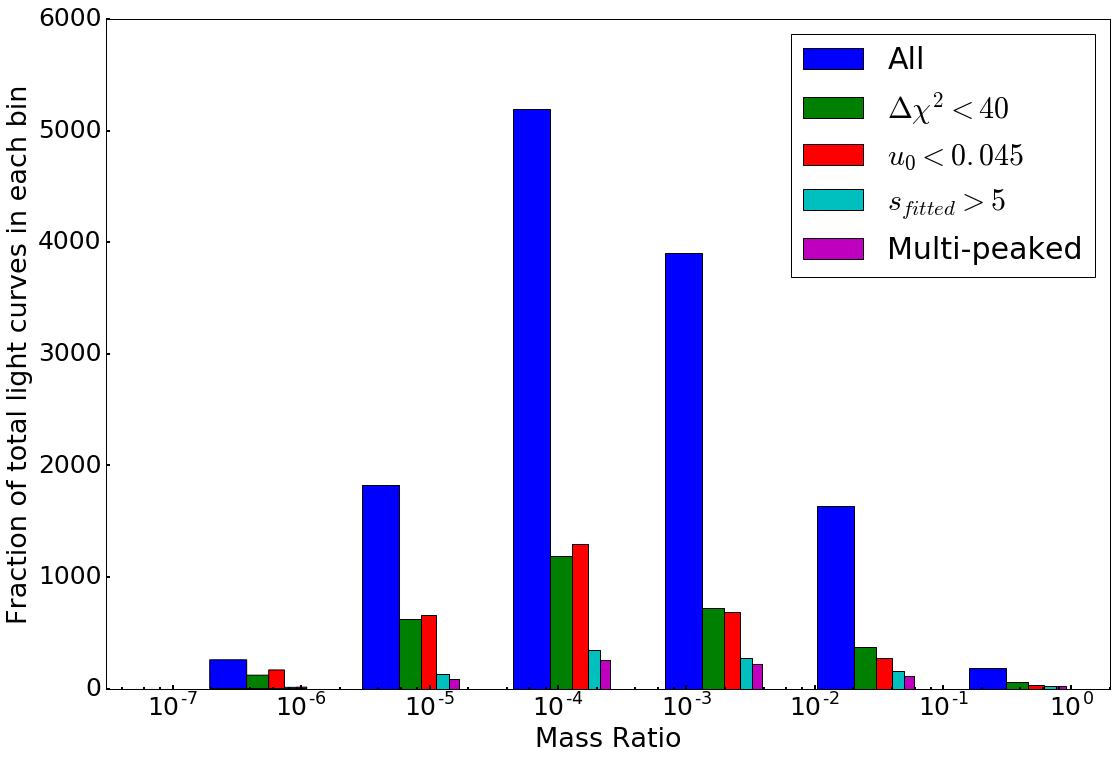

In [157]:
n1, bins1, patches1 = plt.hist ([np.sort(x1),np.sort(x2),np.sort(x3),np.sort(x4),np.sort(x5)], bins=np.logspace(np.log10(8e-8),np.log10(1),7),histtype='bar', 
                            
                            label=[ 'All','$\Delta {{\chi}^2} <40$', '$u_0 < 0.045$', '${s}_{fitted} >5$','Multi-peaked'] )
#weights = [w2,w3,w4,w5],
plt.xlabel('Mass Ratio',size=27)
plt.ylabel('Fraction of total light curves in each bin',size=27)

plt.tick_params(axis='both',labelsize=25)
plt.tick_params(axis='both',width=2, which='minor',top='off',right='off')
plt.tick_params(axis='both',width=2, which='major',top='off',right='off')



plt.legend(fontsize=30)
fig = plt.gcf()
#fig.set_size_inches(11,8.5)
plt.xscale('log')
plt.xlim(3e-8,2)
#plt.yscale('log')
# fig = plt.gcf()
fig.set_size_inches(18.0,12.0)
fig.savefig(home+'/Desktop/hist_mass_ratio_smoothed_normlized_to_each_bin.png')



In [16]:
n1

[array([ 262., 1824., 5195., 3902., 1640.,  187.]),
 array([ 122.,  621., 1183.,  724.,  373.,   55.]),
 array([ 170.,  658., 1299.,  687.,  278.,   33.]),
 array([ 11., 134., 347., 275., 157.,  27.]),
 array([ 13.,  88., 257., 222., 112.,  19.])]

In [17]:
bins1

array([8.00000000e-08, 1.21873230e-06, 1.85663553e-05, 2.82842712e-04,
       4.30886938e-03, 6.56419788e-02, 1.00000000e+00])

In [158]:
x1 = np.array(df['q_true_log'])
x2 = np.array(df['q_true_log'][((red_chi_2_1-red_chi_2_2)<40)])
x3 = np.array(df['q_true_log'][(df['s_fitted']<1.03)&(df['s_fitted']>0.97)] )#[(df['u0_fitted']<0.045)])
x4 = np.array(df['q_true_log'][(df['s_fitted']>5)])
x5 = np.array(np.log10(dd['q_true']))
x = np.array([x1,x2,x3,x4])




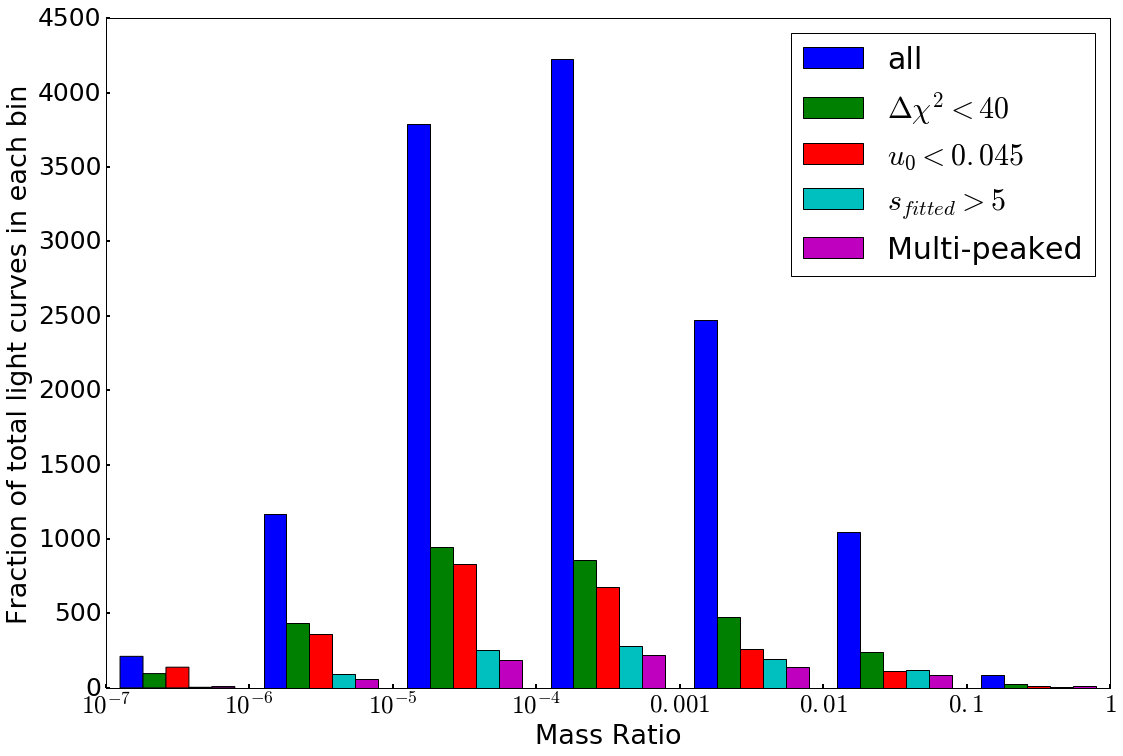

In [159]:
n_q, bins_q, patches_q = plt.hist ([np.sort(x1),np.sort(x2),np.sort(x3),np.sort(x4),np.sort(x5)], bins=[-7,-6,-5,-4,-3,-2,-1,0],histtype='bar', 
                             #weights = [w2,w3,w4,w5],
                                   label=[ 'all','$\Delta {{\chi}^2} <40$', '$u_0 < 0.045$', '${s}_{fitted} >5$','Multi-peaked'] )
#weights = [w2,w3,w4,w5],
plt.xlabel('Mass Ratio',size=27)
plt.ylabel('Fraction of total light curves in each bin',size=27)

plt.tick_params(axis='both',labelsize=25)
plt.tick_params(axis='both',width=2, which='minor',top='off',right='off')
plt.tick_params(axis='both',width=2, which='major',top='off',right='off')



plt.legend(fontsize=30)
fig = plt.gcf()
ax = plt.axes()
#fig.set_size_inches(11,8.5)
#plt.xscale('log')
plt.xlim(-7,0)
ax.set_xticklabels(['$10^{-7}$','$10^{-6}$','$10^{-5}$','$10^{-4}$','$0.001$','$0.01$','$0.1$','$1$'])
#plt.yscale('log')
# fig = plt.gcf()
fig.set_size_inches(18.0,12.0)
fig.savefig(home+'/Desktop/hist_mass_ratio_smoothed_normlized_to_each_bin.png')




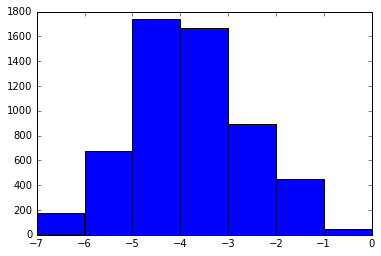

In [160]:
n_q_remaining, bins_q_, patches_q_ = plt.hist (np.sort(df_remaining['q_true_log']), bins=[-7,-6,-5,-4,-3,-2,-1,0],histtype='bar' ,label=[ 'remaining'])

In [29]:
n_q_remaining

array([  40.,  471., 1969., 2491., 1532.,  564.,   41.])

In [30]:
temp_q = []
for i in range(5):
    print (i)
    
    w_q = list((1/n_q[0][0])*np.ones(int(n_q[i][0]))) + list((1/n_q[0][1])*np.ones(int(n_q[i][1]))) + list((1/n_q[0][2])*np.ones(int(n_q[i][2]))) +list((1/n_q[0][3])*np.ones(int(n_q[i][3]))) + list((1/n_q[0][4])*np.ones(int(n_q[i][4]))) +list((1/n_q[0][5])*np.ones(int(n_q[i][5])))
    temp_q.append(w_q)
    


0
1
2
3
4


In [31]:
temp_q

[[0.0047169811320754715,
  0.0047169811320754715,
  0.0047169811320754715,
  0.0047169811320754715,
  0.0047169811320754715,
  0.0047169811320754715,
  0.0047169811320754715,
  0.0047169811320754715,
  0.0047169811320754715,
  0.0047169811320754715,
  0.0047169811320754715,
  0.0047169811320754715,
  0.0047169811320754715,
  0.0047169811320754715,
  0.0047169811320754715,
  0.0047169811320754715,
  0.0047169811320754715,
  0.0047169811320754715,
  0.0047169811320754715,
  0.0047169811320754715,
  0.0047169811320754715,
  0.0047169811320754715,
  0.0047169811320754715,
  0.0047169811320754715,
  0.0047169811320754715,
  0.0047169811320754715,
  0.0047169811320754715,
  0.0047169811320754715,
  0.0047169811320754715,
  0.0047169811320754715,
  0.0047169811320754715,
  0.0047169811320754715,
  0.0047169811320754715,
  0.0047169811320754715,
  0.0047169811320754715,
  0.0047169811320754715,
  0.0047169811320754715,
  0.0047169811320754715,
  0.0047169811320754715,
  0.0047169811320754715,


In [32]:
w2 = np.array(temp_q[1])
w3 = np.array(temp_q[2])
w4 = np.array(temp_q[3])
w5 = np.array(temp_q[4])
#w4 = np.array(temp[4])

In [33]:
len(w3)

2382

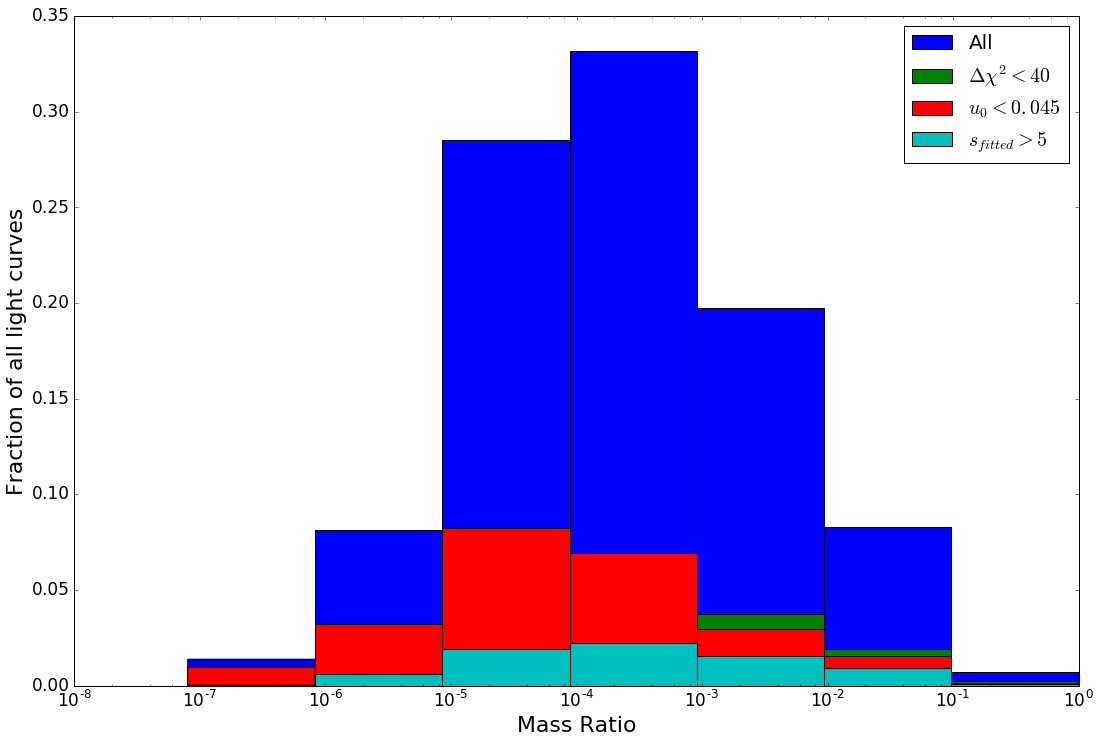

In [8]:
weights = np.ones_like(df['q_true'])/float(len(df['q_true']))

plt.hist(df['q_true'],bins=np.logspace(np.log10(8e-8),np.log10(1),8),label='All',
        weights = np.ones_like(df['q_true'])/float(len(df['q_true'])))

plt.hist(df['q_true'][((red_chi_2_1-red_chi_2_2)<40)],bins=np.logspace(np.log10(8e-8),np.log10(1),8),
         label='$\Delta {{\chi}^2} <40$',
        weights = np.ones_like(df['q_true'][((red_chi_2_1-red_chi_2_2)<40)])/float(len(df['q_true']))) #[((red_chi_2_1-red_chi_2_2)<0.001)])))



plt.hist(df['q_true'][(df['u0_fitted']<0.045)],bins=np.logspace(np.log10(8e-8),np.log10(1),8),
       label= '$u_0 < 0.045$',
        weights = np.ones_like(df['q_true'][(df['u0_fitted']<0.045)])/float(len(df['q_true'])))


plt.hist(df['q_true'][(df['s_fitted']>5)],bins=np.logspace(np.log10(8e-8),np.log10(1),8),
        label= '${s}_{fitted} >5$',
        weights = np.ones_like(df['q_true'][(df['s_fitted']>5)])/float(len(df['q_true'] )))#[(red_chi_2_2>1.25)])))

plt.xlabel('Mass Ratio',size=22)
plt.ylabel('Fraction of total light curves in each bin',size=22)

plt.tick_params(axis='both',labelsize=17)
plt.legend(fontsize=20)
fig = plt.gcf()
fig.set_size_inches(11,8.5)
plt.xscale('log')
#plt.yscale('log')
fig = plt.gcf()
fig.set_size_inches(18.0,12.0)
#fig.savefig(home+'/Desktop/hist_mass_ratio_smoothed.png')

In [9]:
hist_all = np.histogram(df['q_true'],bins=[1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1])
hist_passed = np.histogram(df['q_true'][(red_chi_2_2<1.25)&((red_chi_2_1-red_chi_2_2)>0.001)],bins=[1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1])

In [10]:
(hist_passed[0]/np.asarray(hist_all[0],dtype=float))*100

array([0., 0., 0., 0., 0., 0., 0.])

In [18]:
hist ,edge = np.histogram(df['s_true'],bins=np.logspace(np.log10(0.006),np.log10(70),20))
hist2 ,edge2 = np.histogram(df['s_true'][((red_chi_2_1-red_chi_2_2)<40)],bins=np.logspace(np.log10(0.006),np.log10(70),20))
hist3 ,edge3 = np.histogram(df['s_true'][(df['u0_fitted']<0.045)],bins=np.logspace(np.log10(0.006),np.log10(70),20))
hist4 ,edge4 = np.histogram(df['s_true'][(df['s_fitted']>5)],bins=np.logspace(np.log10(0.006),np.log10(70),20))
hist5 ,edge5 = np.histogram(dd['s_true'],bins=np.logspace(np.log10(0.006),np.log10(70),20))




In [19]:
len(hist)

19

In [20]:
hist2 = [(float(hist2[i])/hist[i]) for i in arange(len(hist))]
hist3 = [(float(hist3[i])/hist[i]) for i in arange(len(hist))]
hist4 = [(float(hist4[i])/hist[i]) for i in arange(len(hist))]
hist5 = [(float(hist5[i])/hist[i]) for i in arange(len(hist))]



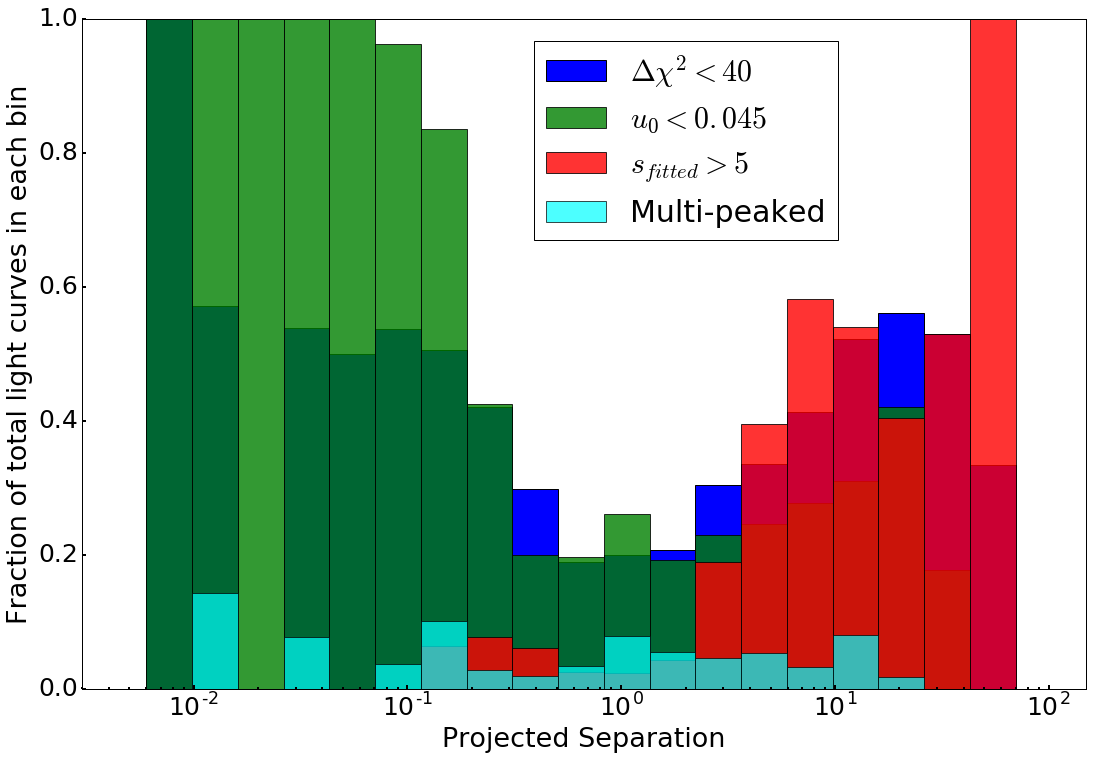

In [25]:
plt.bar(edge2[:-1], hist2 , width=[(edge2[i+1]-edge2[i]) for i in arange(len(edge2)-1)], color='blue',label='$\Delta {{\chi}^2} <40$')
plt.bar(edge3[:-1], hist3 , width=[(edge3[i+1]-edge3[i]) for i in arange(len(edge3)-1)], color='green',label= '$u_0 < 0.045$',alpha=0.8)
plt.bar(edge4[:-1], hist4 , width=[(edge4[i+1]-edge4[i]) for i in arange(len(edge4)-1)], color='red',label= '${s}_{fitted} >5$',alpha=0.8)
plt.bar(edge5[:-1], hist5 , width=[(edge5[i+1]-edge5[i]) for i in arange(len(edge5)-1)], color='cyan',label = 'Multi-peaked',alpha=0.7)

plt.xlabel('Projected Separation',size=27)
plt.ylabel('Fraction of total light curves in each bin',size=27)
plt.xlim(3e-3,150)
plt.tick_params(axis='both',labelsize=25)
plt.legend(fontsize=30,loc=(0.45,0.67))
plt.tick_params(axis='both',labelsize=25)
plt.tick_params(axis='both',width=2, which='minor',top='off',right='off')
plt.tick_params(axis='both',width=2, which='major',top='off',right='off')
fig = plt.gcf()
fig.set_size_inches(11,8.5)
plt.xscale('log')
#plt.yscale('log')
fig = plt.gcf()
fig.set_size_inches(18.0,12.0)
fig.savefig(home+'/Desktop/hist_separation_smoothed_normalized_to_each_bin.png')

In [161]:
y1 = np.array(df['s_true'])
y2 = np.array(df['s_true'][((red_chi_2_1-red_chi_2_2)<40)])
y3 = np.array(df['s_true'][(df['s_fitted']<1.03)&(df['s_fitted']>0.97)]) #[(df['u0_fitted']<0.045)])
y4 = np.array(df['s_true'][(df['s_fitted']>5)])
y5 = np.array((dd['s_true']))


#weights = [w1,w2,w3,w4],

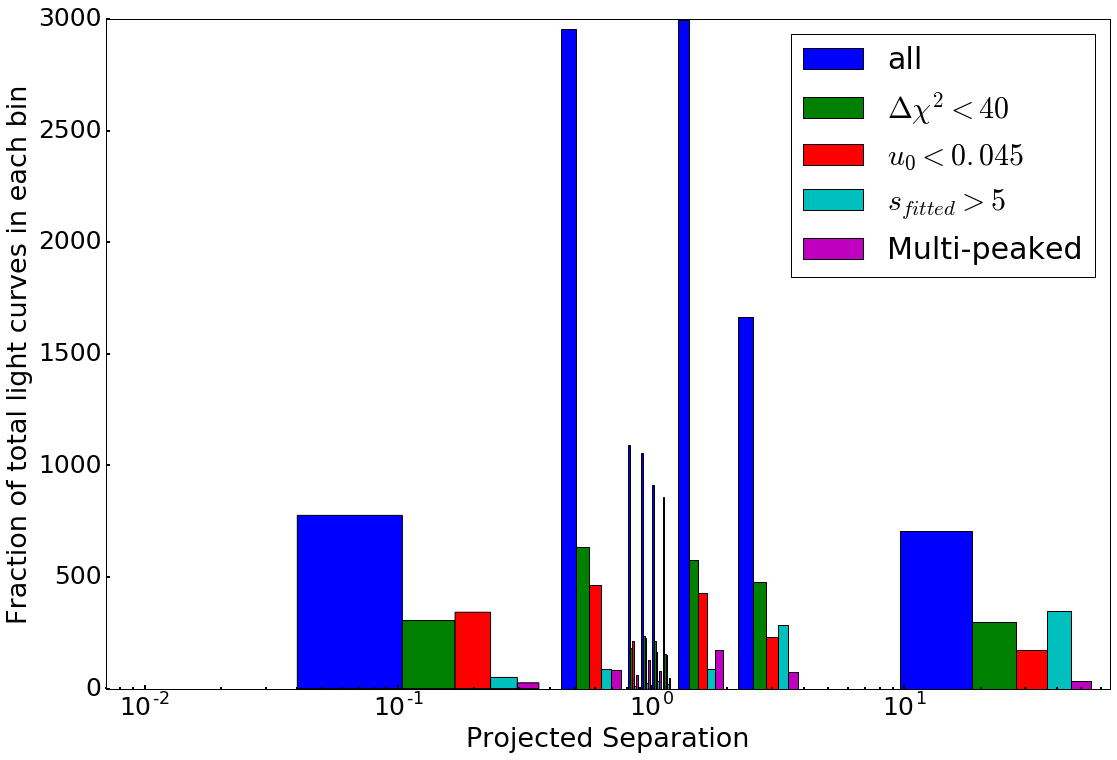

In [162]:
n_s, bins_s, patches_s = plt.hist ([np.sort(y1),np.sort(y2),np.sort(y3),np.sort(y4),np.sort(y5)], bins=[0,0.4,0.8,0.9,1.0,1.1,1.2,2,4,60], histtype='bar',
                            label=['all','$\Delta {{\chi}^2} <40$', '$u_0 < 0.045$', '${s}_{fitted} >5$','Multi-peaked'] )
#weights = [w1,w2,w3,w4],
plt.xlabel('Projected Separation',size=27)
plt.ylabel('Fraction of total light curves in each bin',size=27)
plt.tick_params(axis='both',labelsize=25)
plt.tick_params(axis='both',labelsize=25)
plt.tick_params(axis='both',width=2, which='minor',top='off',right='off')
plt.tick_params(axis='both',width=2, which='major',top='off',right='off')

plt.legend(fontsize=30)
fig = plt.gcf()
#fig.set_size_inches(11,8.5)
plt.xscale('log')
#plt.yscale('log')
plt.xlim(0.007,65)
#plt.ylim(0,1.01)
# fig = plt.gcf()
fig.set_size_inches(18.0,12.0)
fig.savefig(home+'/Desktop/hist_separation_smoothed_normalized_to_each_bin.png')


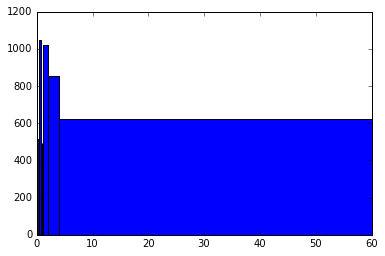

In [163]:
n_s_remaining, bins_s_, patches_s_ = plt.hist (np.sort(df_remaining['s_true']), bins=[0,0.4,0.8,0.9,1.0,1.1,1.2,2,4,60], histtype='bar')



In [13]:
len(n[0])

NameError: name 'n' is not defined

In [14]:
temp_s = []
for i in range(5):
    print (i)
    
    w_s = list((1/n_s[0][0])*np.ones(int(n_s[i][0]))) + list((1/n_s[0][1])*np.ones(int(n_s[i][1]))) \
    + list((1/n_s[0][2])*np.ones(int(n_s[i][2]))) + list((1/n_s[0][3])*np.ones(int(n_s[i][3]))) \
    + list((1/n_s[0][4])*np.ones(int(n_s[i][4]))) +list((1/n_s[0][5])*np.ones(int(n_s[i][5]))) \
    + list((1/n_s[0][6])*np.ones(int(n_s[i][6]))) + list((1/n_s[0][7])*np.ones(int(n_s[i][7]))) \
    + list((1/n_s[0][8])*np.ones(int(n_s[i][8]))) #+ list((1/n[0][9])*np.ones(int(n[i][9]))) \
    #+ list((1/n[0][10])*np.ones(int(n[i][10]))) + list((1/n[0][11])*np.ones(int(n[i][11]))) \
    #+ list((1/n[0][12])*np.ones(int(n[i][12]))) + list((1/n[0][13])*np.ones(int(n[i][13])))
    temp_s.append(w_s)

0
1
2
3
4


In [16]:
w0 = np.array(temp_s[0])
w1 = np.array(temp_s[1])
w2 = np.array(temp_s[2])
w3 = np.array(temp_s[3])
w4 = np.array(temp_s[4])

In [17]:
len(w0)

13010

In [18]:
n_q

NameError: name 'n_q' is not defined

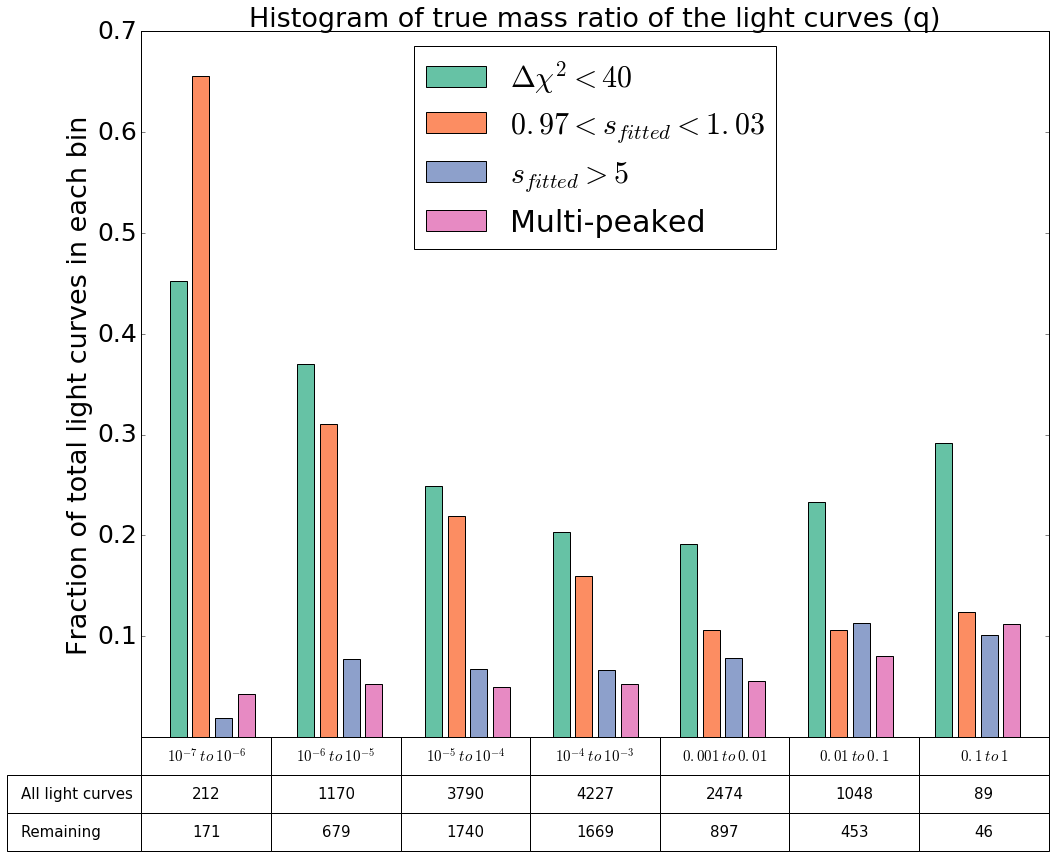

In [164]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# -7,-6,-5,-4,-3,-2,-1,0

data = n_q
# data = [[ 66386, 174296,  75131, 577908,  32015],
#         [ 58230, 381139,  78045,  99308, 160454],
#         [ 89135,  80552, 152558, 497981, 603535],
#         [ 78415,  81858, 150656, 193263,  69638],
#         [139361, 331509, 343164, 781380,  52269]]

columns = ('$10^{-7} \: to \: 10^{-6}$', '$10^{-6} \: to \: 10^{-5}$', '$10^{-5} \: to \: 10^{-4}$',
           '$10^{-4} \: to \: 10^{-3}$', '$ 0.001 \: to \: 0.01$','$ 0.01 \: to \: 0.1$',
           '$ 0.1 \: to \: 1$')
rows = ['All light curves','Remaining']
labels=['$\Delta {{\chi}^2} <40$', '$0.97 < {s}_{fitted} < 1.03$', '${s}_{fitted} >5$','Multi-peaked']


values = np.arange(0, 6000, 1000)
value_increment = 1

# Get some pastel shades for the colors
colors = ['#a6d854','#66c2a5','#fc8d62','#8da0cb','#e78ac3','#ffd92f']#plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index =  np.linspace(-1.5,12,7) #np.arange(len(columns)) + 2
bar_width = 0.3
bw = 0

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(1,n_rows):
    plt.bar(index+bw, data[row]/data[0], bar_width, color=colors[row],align='edge', label=labels[row-1])
    bw = bw +0.4
    y_offset = y_offset + data[row]
    
plt.title('Histogram of true mass ratio of the light curves (q)',size=27)
plt.ylabel('Fraction of total light curves in each bin',size=27)

plt.tick_params(axis='y',labelsize=25)
plt.legend(fontsize=30,loc='upper center')
#for row in range((n_rows)):
cell_text.append(['%1.0f' % (x / 1.0) for x in data[0]])
cell_text.append(['%1.0f' % (x / 1.0) for x in n_q_remaining])
# Reverse colors and text labels to display the last value at the top.
#colors = colors[::-1]
#cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      colLabels=columns,
                      cellLoc='center',
                      loc='bottom')

the_table.set_fontsize(15)

# Adjust layout to make room for the table:

#plt.ylabel("Loss in ${0}'s".format(value_increment))
#plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7])
plt.xticks([])
#plt.title('Loss by Disaster')

fig = plt.gcf()
fig.set_size_inches(18.0,14.0)
fig.subplots_adjust(left=0.2, bottom=0.2, hspace=0.1 )

fig.savefig(home+'/Desktop/barplot_mass_ratio_smoothed_normalized_to_each_bin.png')




In [210]:
n_q/n_q[0]

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        ],
       [0.45283019, 0.37008547, 0.24907652, 0.20369056, 0.19159256,
        0.23282443, 0.29213483],
       [0.6745283 , 0.39230769, 0.28258575, 0.20463686, 0.15117219,
        0.1879771 , 0.17977528],
       [0.01886792, 0.07692308, 0.06754617, 0.06600426, 0.07841552,
        0.11354962, 0.1011236 ],
       [0.04245283, 0.05299145, 0.04934037, 0.05251952, 0.05537591,
        0.08015267, 0.11235955]])

In [160]:
np.logspace(-2.15,1.8,10)

array([7.07945784e-03, 1.94486244e-02, 5.34290900e-02, 1.46779927e-01,
       4.03232525e-01, 1.10775685e+00, 3.04321989e+00, 8.36030694e+00,
       2.29673618e+01, 6.30957344e+01])

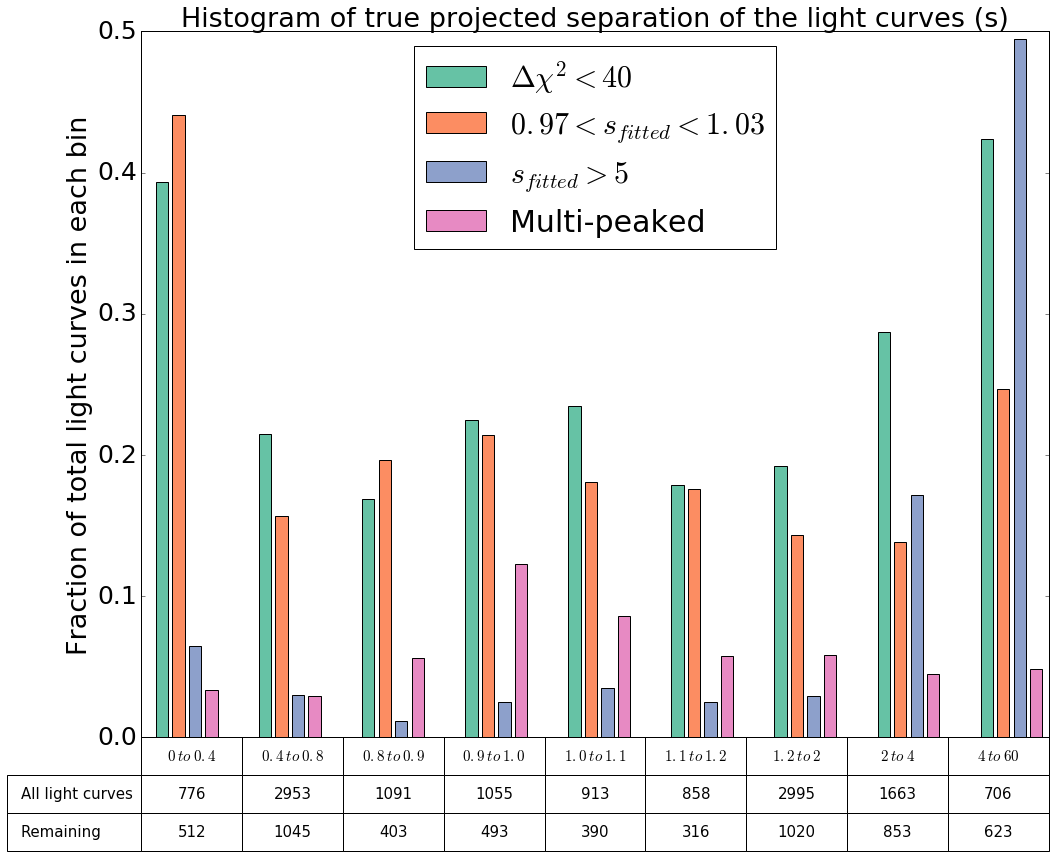

In [165]:
fig, ax = plt.subplots()

# -7,-6,-5,-4,-3,-2,-1,0

data = n_s
# data = [[ 66386, 174296,  75131, 577908,  32015],
#         [ 58230, 381139,  78045,  99308, 160454],
#         [ 89135,  80552, 152558, 497981, 603535],
#         [ 78415,  81858, 150656, 193263,  69638],
#         [139361, 331509, 343164, 781380,  52269]]

columns = ('$0 \: to \: 0.4$', '$0.4 \: to \: 0.8$', '$0.8 \: to \: 0.9$',
           '$0.9 \: to \: 1.0$', '$ 1.0 \: to \: 1.1$','$ 1.1 \: to \: 1.2$',
           '$ 1.2 \: to \: 2$','$ 2 \: to \: 4$','$ 4 \: to \: 60$')
rows = ['All light curves','Remaining']
labels=['$\Delta {{\chi}^2} <40$', '$0.97 < {s}_{fitted} < 1.03$', '${s}_{fitted} >5$','Multi-peaked']


values = np.arange(0, 6000, 1000)
value_increment = 1

# Get some pastel shades for the colors
colors = ['#a6d854','#66c2a5','#fc8d62','#8da0cb','#e78ac3','#ffd92f']#plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index =  np.linspace(0,20,9) #np.arange(len(columns)) + 2
bar_width = 0.3
bw = 0

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(1,n_rows):
    plt.bar(index+bw, data[row]/data[0], bar_width, color=colors[row],align='center', label=labels[row-1])
    bw = bw +0.4
    y_offset = y_offset + data[row]
    
plt.title('Histogram of true projected separation of the light curves (s)',size=27)
plt.ylabel('Fraction of total light curves in each bin',size=27)
plt.xlim(-0.5,21.5)
plt.tick_params(axis='y',labelsize=25)
plt.legend(fontsize=30,loc='upper center')
#for row in range((n_rows)):
cell_text.append(['%1.0f' % (x / 1.0) for x in data[0]])
cell_text.append(['%1.0f' % (x / 1.0) for x in n_s_remaining])
# Reverse colors and text labels to display the last value at the top.
#colors = colors[::-1]
#cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      colLabels=columns,
                      cellLoc='center',
                      loc='bottom')

the_table.set_fontsize(15)

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

#plt.ylabel("Loss in ${0}'s".format(value_increment))
#plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
#plt.title('Loss by Disaster')

fig = plt.gcf()
fig.set_size_inches(18.0,14.0)
fig.savefig(home+'/Desktop/barplot_separation_smoothed_normalized_to_each_bin.png')



In [166]:
len(df_org)

13010

In [169]:
(len(df_org[(df_org['s_fitted']<1.03)&(df_org['s_fitted']>0.97)])/float(len(df_org)))*100

18.393543428132205

In [170]:
(len(df_org[(df_org['s_fitted']>5)])/float(len(df_org)))*100

7.309761721752498

In [174]:
(len(df_remaining)/float(len(df)))*100

43.46656418139892

In [35]:
(dd[['name','s_true','u0_true']][dd['q_true']<1e-6])

,name,s_true,u0_true
59,cassan_17_88_1560.det.lc.gz,0.472140,0.002544
104,cassan_22_83_3080.det.lc.gz,15.440100,0.019469
208,cassan_36_112_36.det.lc.gz,1.164870,0.001834
276,cassan_43_7_2910.det.lc.gz,3.997040,2.887280
326,cassan_4_9_996.det.lc.gz,2.545500,0.001881
391,cassan_11_140_3006.det.lc.gz,1.989600,0.560246
432,cassan_16_9_2425.det.lc.gz,1.183080,0.061750
570,cassan_37_58_2185.det.lc.gz,0.922493,0.058312
596,cassan_42_23_3133.det.lc.gz,5.939580,0.730401


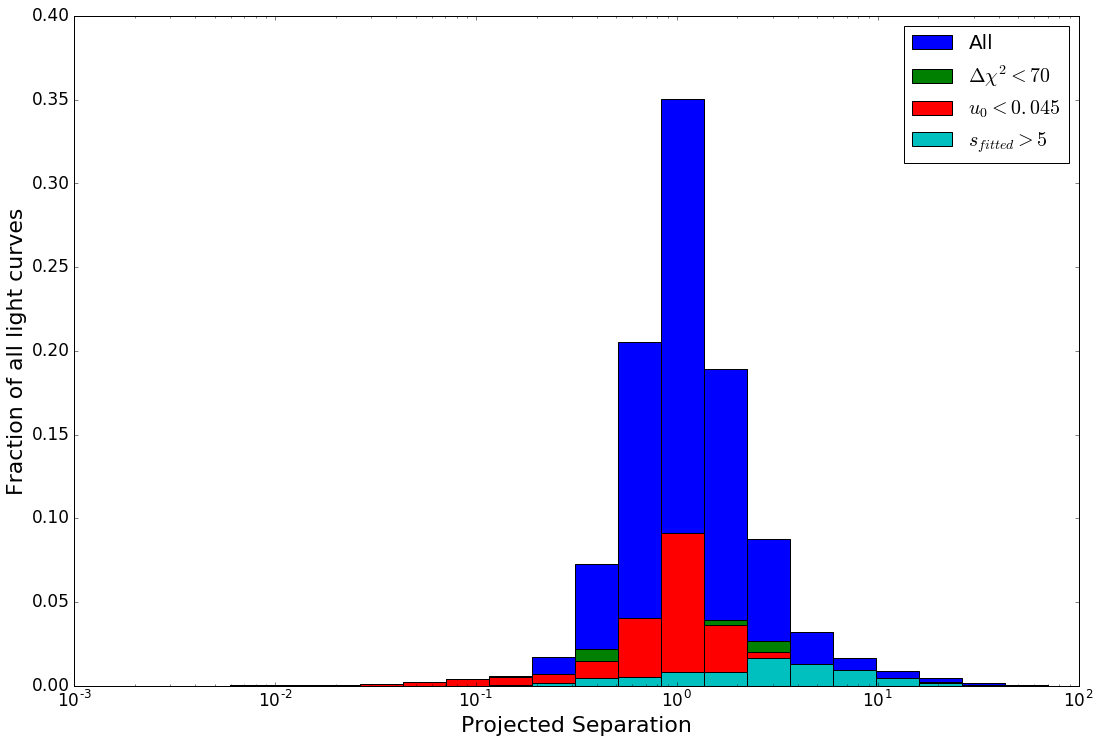

In [161]:
weights = np.ones_like(df['s_true'])/float(len(df['s_true']))

plt.hist(df['s_true'],bins=np.logspace(np.log10(0.006),np.log10(70),20),label='All',
        weights = np.ones_like(df['s_true'])/float(len(df['s_true'])))
plt.hist(df['s_true'][((red_chi_2_1-red_chi_2_2)<40)],bins=np.logspace(np.log10(0.006),np.log10(70),20),
         label='$\Delta {{\chi}^2} <70$',
        weights = np.ones_like(df['s_true'][((red_chi_2_1-red_chi_2_2)<40)])/float(len(df['s_true']))) #[((red_chi_2_1-red_chi_2_2)<0.001)])))



plt.hist(df['s_true'][(df['u0_fitted']<0.045)],bins=np.logspace(np.log10(0.006),np.log10(70),20),
       label= '$u_0 < 0.045$',
        weights = np.ones_like(df['s_true'][(df['u0_fitted']<0.045)])/float(len(df['s_true'])))
plt.hist(df['s_true'][(df['s_fitted']>5)],bins=np.logspace(np.log10(0.006),np.log10(70),20),
        label= '${s}_{fitted} >5$',
        weights = np.ones_like(df['s_true'][(df['s_fitted']>5)])/float(len(df['s_true'] )))#[(red_chi_2_2>1.25)])))

plt.xlabel('Projected Separation',size=22)
plt.ylabel('Fraction of all light curves',size=22)

plt.tick_params(axis='both',labelsize=17)
plt.legend(fontsize=20)
fig = plt.gcf()
fig.set_size_inches(11,8.5)
plt.xscale('log')
#plt.yscale('log')
fig = plt.gcf()
fig.set_size_inches(18.0,12.0)
fig.savefig(home+'/Desktop/hist_separation_smoothed.png')

In [113]:
hist_all = np.histogram(df['s_true'],bins=[0.006,0.5,0.8,0.9,1,1.1,1.3,1.6,1.9,3,5,70])
hist_passed = np.histogram(df['s_true'][(red_chi_2_2<1.25)&((red_chi_2_1-red_chi_2_2)>0.001)],bins=[0.006,0.5,0.8,0.9,1,1.1,1.3,1.6,1.9,3,5,70])

In [114]:
(hist_passed[0]/np.asarray(hist_all[0],dtype=float))*100

array([44.93526276, 62.66611296, 71.96691176, 70.07575758, 75.71115974,
       74.2       , 67.72486772, 58.94988067, 50.63649222, 45.41284404,
       25.52783109])

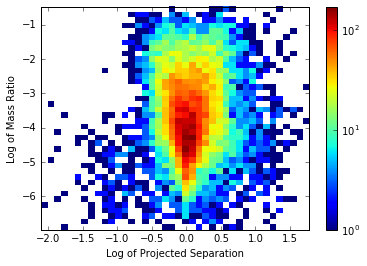

In [11]:
plt.hist2d(df['s_true_log'],df['q_true_log'], bins= 40,
                                           norm=LogNorm())
# plt.xscale('log')
# plt.yscale('log')
# points = plt.scatter(df_n.A, df_n.B, c=df_n.C,cmap="jet", lw=0,norm=matplotlib.colors.LogNorm())
plt.xlabel('Log of Projected Separation')
plt.ylabel('Log of Mass Ratio')
plt.colorbar()

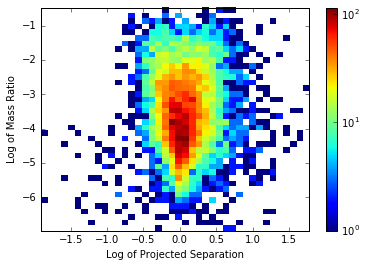

In [17]:
plt.hist2d(df['s_true_log'][((red_chi_2_1-red_chi_2_2)>70)],df['q_true_log'][((red_chi_2_1-red_chi_2_2)>70)], bins= 40,
                                           norm=LogNorm())
# plt.xscale('log')
# plt.yscale('log')
# points = plt.scatter(df_n.A, df_n.B, c=df_n.C,cmap="jet", lw=0,norm=matplotlib.colors.LogNorm())
plt.xlabel('Log of Projected Separation')
plt.ylabel('Log of Mass Ratio')
plt.colorbar()

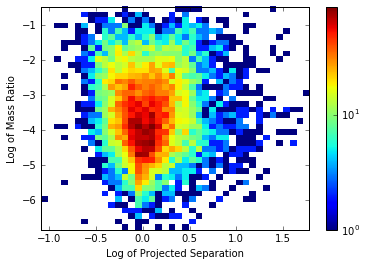

In [16]:
plt.hist2d(df['s_true_log'][df['u0_fitted']>0.045],df['q_true_log'][df['u0_fitted']>0.045], bins= 40,
                                           norm=LogNorm())
# plt.xscale('log')
# plt.yscale('log')
# points = plt.scatter(df_n.A, df_n.B, c=df_n.C,cmap="jet", lw=0,norm=matplotlib.colors.LogNorm())
plt.xlabel('Log of Projected Separation')
plt.ylabel('Log of Mass Ratio')
plt.colorbar()

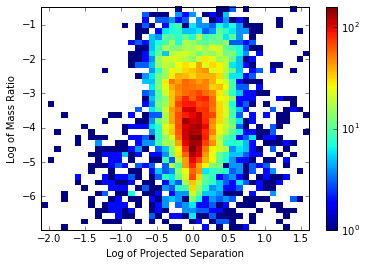

In [15]:
plt.hist2d(df['s_true_log'][df['s_fitted']<5],df['q_true_log'][df['s_fitted']<5], bins= 40,
                                           norm=LogNorm())
# plt.xscale('log')
# plt.yscale('log')
# points = plt.scatter(df_n.A, df_n.B, c=df_n.C,cmap="jet", lw=0,norm=matplotlib.colors.LogNorm())
plt.xlabel('Log of Projected Separation')
plt.ylabel('Log of Mass Ratio')
plt.colorbar()

# Measuring weighted statistics

In [151]:
G = 6.67e-11
m_sun = 1.989e30
kpc = 3.086e19
c = 2.99e8
const = 4*(G*m_sun)/(kpc*(c**2))
d_rel = (df['D_l']*df['D_s'])/(df['D_s']-df['D_l'])
df['theta_E'] = np.sqrt(df['m_l']*const / d_rel)

In [152]:
df['mu_l'] = np.sqrt((df['mu_l_b']**2)+(df['mu_l_l']**2))
df['mu_s'] = np.sqrt((df['mu_s_b']**2)+(df['mu_s_l']**2))

In [153]:
df['mu_rel'] =  df['mu_s']- df['mu_l']

In [154]:
df['weight'] = df['mu_rel']*df['theta_E']

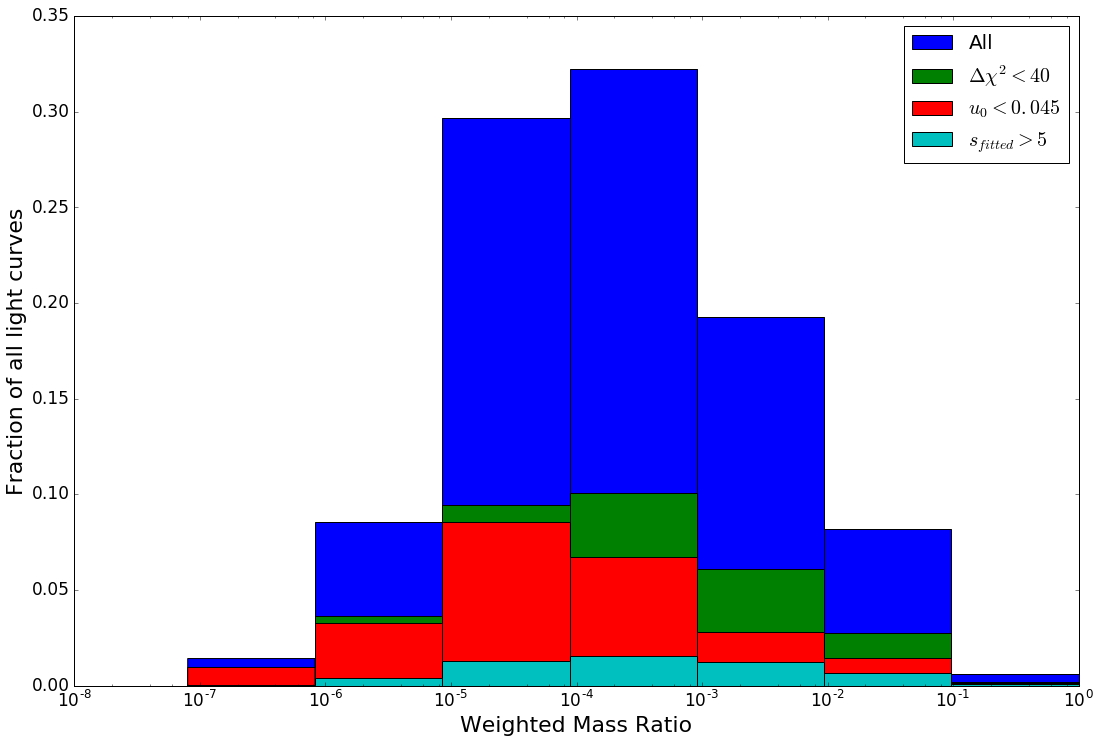

In [155]:
plt.hist(df['q_true'],bins=np.logspace(np.log10(8e-8),np.log10(1),8),label='All',
        weights = df['weight']/np.sum(df['weight']))
plt.hist(df['q_true'][((red_chi_2_1-red_chi_2_2)<40)],bins=np.logspace(np.log10(8e-8),np.log10(1),8),
         label='$\Delta {{\chi}^2} <40$',
        weights = df['weight'][((red_chi_2_1-red_chi_2_2)<40)]/np.sum(df['weight']))


plt.hist(df['q_true'][(df['u0_fitted']<0.045)],bins=np.logspace(np.log10(8e-8),np.log10(1),8),
       label= '$u_0 < 0.045$',
        weights = df['weight'][(df['u0_fitted']<0.045)]/np.sum(df['weight']))
plt.hist(df['q_true'][(df['s_fitted']>5)],bins=np.logspace(np.log10(8e-8),np.log10(1),8),
        label= '${s}_{fitted} >5$',
        weights = df['weight'][(df['s_fitted']>5)]/np.sum(df['weight']))
# plt.hist(df['q_true'][(red_chi_2_2>46024)],bins=np.logspace(np.log10(8e-8),np.log10(1),8),
#         label= '${s}_{fitted} >5$',
#         weights = df['weight'][(red_chi_2_2>46024)]/np.sum(df['weight']))#[(red_chi_2_2>1.25)])))

plt.xlabel('Weighted Mass Ratio',size=22)
plt.ylabel('Fraction of all light curves',size=22)

plt.tick_params(axis='both',labelsize=17)
plt.legend(fontsize=20)
fig = plt.gcf()
fig.set_size_inches(11,8.5)
plt.xscale('log')
#plt.yscale('log')
fig = plt.gcf()
fig.set_size_inches(18.0,12.0)
fig.savefig(home+'/Desktop/hist_mass_ratio_weighted.png')



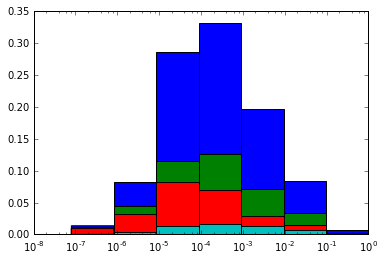

In [110]:
plt.hist(df['q_true'],bins=np.logspace(np.log10(8e-8),np.log10(1),8),
         weights = np.ones_like(df['q_true'])/float(len(df['q_true'])))
plt.hist(df['q_true'][((red_chi_2_1-red_chi_2_2)<70)],bins=np.logspace(np.log10(8e-8),np.log10(1),8),
         label='$\Delta {{\chi}^2} <70$',
        weights = np.ones_like(df['q_true'][((red_chi_2_1-red_chi_2_2)<70)])/float(len(df['q_true']))) #[((red_chi_2_1-red_chi_2_2)<0.001)])))



plt.hist(df['q_true'][(df['u0_fitted']<0.045)],bins=np.logspace(np.log10(8e-8),np.log10(1),8),
       label= '$u_0 < 0.045$',
        weights = np.ones_like(df['q_true'][(df['u0_fitted']<0.045)])/float(len(df['q_true'])))
plt.hist(df['q_true'][(df['s_fitted']>5)],bins=np.logspace(np.log10(8e-8),np.log10(1),8),
        label= '${s}_{fitted} >5$',
        weights = np.ones_like(df['q_true'][(df['s_fitted']>5)])/float(len(df['q_true'] )))#[(red_chi_2_2>1.25)])))
# plt.hist(df['q_true'][(red_chi_2_2>46024)],bins=np.logspace(np.log10(8e-8),np.log10(1),8),
#         label= '${s}_{fitted} >5$',
#         weights = np.ones_like(df['q_true'][(red_chi_2_2>46024)])/float(len(df['q_true'] )))#[(red_chi_2_2>1.25)])))


plt.xscale('log')
#plt.yscale('log')

In [106]:
len(df[(df['s_fitted']>5)])/float(len(df))*100

5.387980658530969

In [ ]:
plt.hist(-2*(df['chi_2_1']-df['chi_2_2']),,bins=np.logspace(np.log10(8e-8),np.log10(1),8) )

In [18]:
len(df)

13010